# Notebook para la entrega final

Ahora que tenemos claro que hacer, iteremos sobre este notebook y dejemos el otro por si acaso.
Lo que necesitamos es:

* buscar punto de overfitting e implementaqr early stopping
* buscar tamaño optimo para la red (posiblemente entre 100 y 500 neuronas por layer, podemos dejar un tamaño al ojo)
* buscar los mejores parametros en los descriptores de texto (esto es algo extra)
* hacer graficos bonitos
* explicar los pasos y teoria
* mostrar una confianza o desviacion estandar general usando mas de un test set (los A, B y C que subio el porfe) (tambien es opcional)

In [1]:
from src.filehandler import DataHandler
from src.regressor import Regressor, plot_metrics
from src.indicators import Indicators
from stop_words import get_stop_words

Using TensorFlow backend.


### Read data

In [7]:
stop_words = get_stop_words('spanish')
stop_words = None
data = DataHandler(root_folder="./data", train_folder="/train_data", test_folder="/test_A_data")
#X_train, X_test, y_train, y_test = data.get_data_count_vectorizer()
X_train, X_test, y_train, y_test = data.get_data(method="tf-idf", stop_words=stop_words, ngram_r=())
print("shapes")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

leyendo ./data/train_data/train_images_names.txt
leyendo ./data/train_data/train_images_vectors.bin
20000 vectores de largo 2048
leyendo ./data/test_A_data/test_A_images_names.txt
leyendo ./data/test_A_data/test_A_images_vectors.bin
1000 vectores de largo 2048
doing vectorization with TfidfVectorizer
fitting ...done
getting vectors transforms ...done
shapes
X_train: (100000, 1659)
y_train: (100000, 2048)
X_test: (5000, 1659)
y_test: (5000, 2048)


### Get regression

In [8]:
reg = Regressor(input_dim=X_train.shape[1], output_dim=y_train.shape[1], n=2, layer_size=100)
reg.build()
history = reg.fit(X_train, y_train, epochs=10)
reg.save(model_file="model")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               166000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              206848    
Total params: 382,948
Trainable params: 382,948
Non-trainable params: 0
_________________________________________________________________
Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 4s 51us/step - loss: 0.6779 - mean_absolute_error: 0.4963 - acc: 0.0480 - val_loss: 0.5970 - val_mean_absolute_error: 0.4692 - val_acc: 0.1051
Epoch 2/10
80000/80000 [==============================] - 4s 48us/step - loss: 0.5745 - mean_absolute_error: 0.4636 - acc: 0.1257 - val_loss: 0.5589 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])
evaluando test
5000/5000 [==============================] - 0s 32us/step
mean_absolute_error: 0.44
loss: 0.52
acc: 21.30%


[0.5221021991729736, 0.44061321206092835, 0.213]

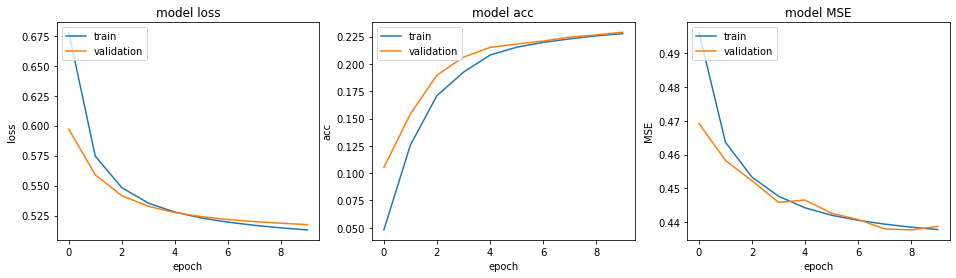

In [9]:
plot_metrics(history)
# podemos evaluar el regresor en el test set
reg.evaluate(X_test, y_test)

In [10]:
# tambien podemos cargar el modelo
reg_load = Regressor()
reg_load.load(model_file="model")
reg_load.evaluate(X_test, y_test)

Loaded model from disk
evaluando test
5000/5000 [==============================] - 0s 41us/step
mean_absolute_error: 0.44
loss: 0.52
acc: 21.30%


[0.5221021991729736, 0.44061321206092835, 0.213]

### get indicators

In [11]:
vectores = reg_load.predict(X_test)

In [12]:
ind = Indicators()
rank = ind.similarity_search(y_test, vectores)

initializing KDTRee ... done!
computing distances with L2 metric ...

KeyboardInterrupt: 